In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import acquire 


## Store Data

In [2]:
df = acquire.get_overall_sales_data()

 3 of 3: https://python.zgulde.net/api/v1/items?page=3ge=183

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_id        913000 non-null  int64  
 2   sale_amount    913000 non-null  float64
 3   item_id        913000 non-null  int64  
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  object 
 7   item_upc14     913000 non-null  object 
 8   store          913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 97.5+ MB


In [4]:
df.dtypes

sale_date         object
sale_id            int64
sale_amount      float64
item_id            int64
item_name         object
item_price       float64
item_upc12        object
item_upc14        object
store              int64
store_address     object
store_city        object
store_state       object
store_zipcode     object
dtype: object

In [5]:
df

,sale_date,sale_id,sale_amount,item_id,item_name,item_price,item_upc12,item_upc14,store,store_address,store_city,store_state,store_zipcode
0,"Tue, 01 Jan 2013 00:00:00 GMT",1,13.0,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,"Wed, 02 Jan 2013 00:00:00 GMT",2,11.0,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,"Thu, 03 Jan 2013 00:00:00 GMT",3,14.0,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,"Fri, 04 Jan 2013 00:00:00 GMT",4,13.0,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,"Sat, 05 Jan 2013 00:00:00 GMT",5,10.0,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,"Wed, 27 Dec 2017 00:00:00 GMT",912996,63.0,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,10,8503 NW Military Hwy,San Antonio,TX,78231
912996,"Thu, 28 Dec 2017 00:00:00 GMT",912997,59.0,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,10,8503 NW Military Hwy,San Antonio,TX,78231
912997,"Fri, 29 Dec 2017 00:00:00 GMT",912998,74.0,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,10,8503 NW Military Hwy,San Antonio,TX,78231
912998,"Sat, 30 Dec 2017 00:00:00 GMT",912999,62.0,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,10,8503 NW Military Hwy,San Antonio,TX,78231


### Convert date column to datetime format

In [6]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

df.dtypes

sale_date        datetime64[ns, UTC]
sale_id                        int64
sale_amount                  float64
item_id                        int64
item_name                     object
item_price                   float64
item_upc12                    object
item_upc14                    object
store                          int64
store_address                 object
store_city                    object
store_state                   object
store_zipcode                 object
dtype: object

### Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

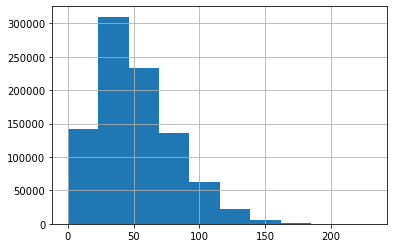

In [7]:
df.sale_amount.hist()

<AxesSubplot:>

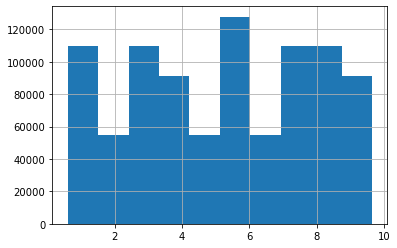

In [8]:
df.item_price.hist()

In [9]:
def sales_hist_enum():
    power = acquire.get_power()
    col = df[['sale_amount', 'item_price']]
    
    plt.figure(figsize=(16, 3))
    for i, col in enumerate(col):
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1
        # Create subplot.
        # plt.subplot(row X col, where?)
        plt.subplot(1,4,plot_number)
        # Title with column name.
        plt.title(col)
        # Display histogram for column.
        df[col].hist(bins=5, edgecolor='black')
        # Hide gridlines.
        plt.grid(False)
    return

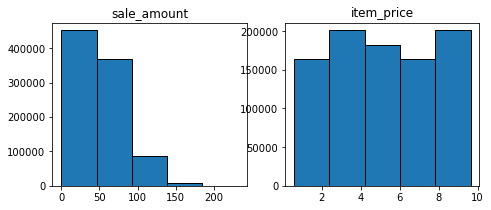

In [10]:
sales_hist_enum()

### Set the index to be the datetime variable.

In [11]:
# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()
# check if index is a datetime type
df.index.inferred_type == "datetime64"

True

### Add a 'month' and 'day of week' column to your dataframe.

In [12]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='sale_date', length=913000)

In [13]:
df.index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='sale_date', length=913000)

In [14]:
df['month_name'] = df.index.month_name()
df['day_name'] = df.index.day_name()
df.head()

,sale_id,sale_amount,item_id,item_name,item_price,item_upc12,item_upc14,store,store_address,store_city,store_state,store_zipcode,month_name,day_name
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday
2013-01-01 00:00:00+00:00,211817,26.0,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01 00:00:00+00:00,832657,27.0,46,Pizza Sauce,4.65,35457770664,35457770664,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01 00:00:00+00:00,213643,54.0,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,8,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday
2013-01-01 00:00:00+00:00,215469,35.0,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,9,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday


### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [15]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,sale_id,sale_amount,item_id,item_name,item_price,item_upc12,item_upc14,store,store_address,store_city,store_state,store_zipcode,month_name,day_name,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,211817,26.0,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,832657,27.0,46,Pizza Sauce,4.65,35457770664,35457770664,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,213643,54.0,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,8,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,215469,35.0,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,9,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00


### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prep_overall_sales():
    # retrive data
    df = acquire.get_overall_sales_data()
    # Reassign the sale_date column to be a datetime type
    df.sale_date = pd.to_datetime(df.sale_date)
    # Sort rows by the date and then set the index as that date
    df = df.set_index("sale_date").sort_index()
    # Add month and day columns
    df['month_name'] = df.index.month_name()
    df['day_name'] = df.index.day_name()
    # Create sales total column
    df['sales_total'] = df.sale_amount * df.item_price
    return df

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [16]:
power = acquire.get_power()

In [17]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [18]:
power.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [19]:
power.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [20]:
power

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


### Convert date column to datetime format.

In [21]:
# Reassign the sale_date column to be a datetime type
power.Date = pd.to_datetime(power.Date)

power.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

### Plot the distribution of each of your variables.

<AxesSubplot:>

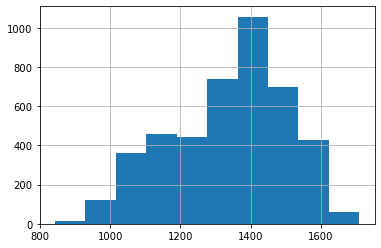

In [22]:
power.Consumption.hist()


<AxesSubplot:>

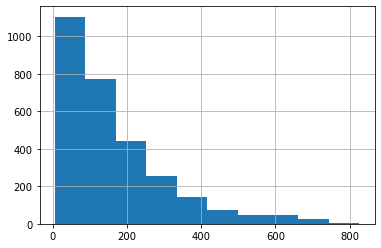

In [23]:
power.Wind.hist()


<AxesSubplot:>

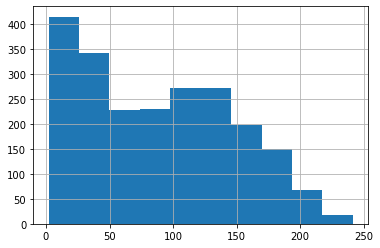

In [24]:
power.Solar.hist()


<AxesSubplot:>

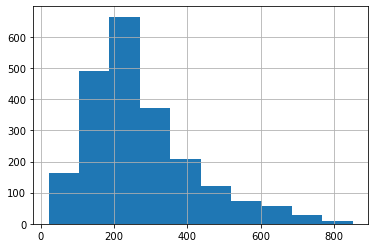

In [25]:
(power.Wind + power.Solar).hist()

In [26]:
def power_hist_enum():
    #power = acquire.get_power()
    col = power[['Wind', 'Solar', 'Wind+Solar']]
    
    plt.figure(figsize=(16, 3))
    for i, col in enumerate(col):
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1
        # Create subplot.
        # plt.subplot(row X col, where?)
        plt.subplot(1,4,plot_number)
        # Title with column name.
        plt.title(col)
        # Display histogram for column.
        power[col].hist(bins=5, edgecolor='black')
        # Hide gridlines.
        plt.grid(False)
    return

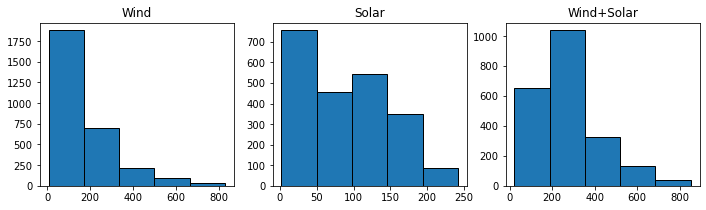

In [27]:
power_hist_enum()

### Set the index to be the datetime variable.

In [28]:
# Sort rows by the date and then set the index as that date
power = power.set_index("Date").sort_index()
# check if index is a datetime type
power.index.inferred_type == "datetime64"

True

In [29]:
power.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### Add a month and a year column to your dataframe.

In [30]:
power.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [31]:
power['month_name'] = power.index.month_name()
power['year'] = power.index.year
power.head()

,Consumption,Wind,Solar,Wind+Solar,month_name,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


### Fill any missing values.

In [32]:
power = power.fillna(0)
power.head()

,Consumption,Wind,Solar,Wind+Solar,month_name,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [33]:
power[power['Wind+Solar'] != 0]

,Consumption,Wind,Solar,Wind+Solar,month_name,year
Date,,,,,,
2012-01-01,948.12800,227.465,6.587,234.052,January,2012
2012-01-02,1269.58100,207.327,6.574,213.901,January,2012
2012-01-03,1334.74500,473.468,24.679,498.147,January,2012
2012-01-04,1347.13600,499.804,14.681,514.485,January,2012
2012-01-05,1376.65800,523.851,5.071,528.922,January,2012
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [ ]:
def prep_power():
    # Retrive the data
    power = acquire.get_power()
    # Reassign the sale_date column to be a datetime type
    power.Date = pd.to_datetime(power.Date)
    # Sort rows by the date and then set the index as that date
    power = power.set_index("Date").sort_index()
    # Create moth and year columns
    power['month_name'] = power.index.month_name()
    power['year'] = power.index.year
    # Fill in null values
    power = power.fillna(0)
    return power
